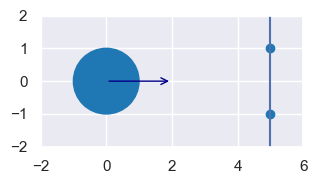

In [33]:
from perfect_physics import Circle, Wall, plot

a = Circle(x=0,y=0,r=1,vx=2,vy=0)
w = Wall(x0=5,y0=-1,x1=5,y1=1)
plot(circle_list=[a], wall_list=[w],
     xlim=(-2,6), ylim=(-2,2), figsize=(4,2),
     draw_wall_points=True, font_scale=1)
pass # avoid showing the plot twice

In [2]:
from sympy import symbols, Eq
t = symbols("t")
a_x, a_y, a_vx, a_vy, a_r, aprime_x, aprime_y = symbols("a_x, a_y, a_vx, a_vy, a_r, a'_x, a'_y")
eq1 = Eq(aprime_x, a_x + a_vx * t)
eq2 = Eq(aprime_y, a_y + a_vy * t)

In [3]:
p = symbols("p")
x0, y0, x1, y1, x2, y2 = symbols("x_0, y_0, x_1, y_1, x_2, y_2")
eq3 = Eq(x2, x0 + (x1-x0) * p)
eq4 = Eq(y2, y0 + (y1-y0) * p)

eq3

Eq(x_2, p*(-x_0 + x_1) + x_0)

In [4]:
eq5 = Eq((x2-aprime_x)**2 + (y2-aprime_y)**2, a_r**2)
eq5

Eq((-a'_x + x_2)**2 + (-a'_y + y_2)**2, a_r**2)

In [16]:
from sympy import nonlinsolve
from perfect_physics import save

cw_all_solutions5 = nonlinsolve([eq1, eq2, eq3, eq4, eq5], t, aprime_x, aprime_y, x2, y2)
cw_time_solutions5 = [t for t, aprime_x, aprime_y, x2, y2 in cw_all_solutions5]
cw_time_solutions5[0]

(-a_vx*a_x - a_vx*p*x_0 + a_vx*p*x_1 + a_vx*x_0 - a_vy*a_y - a_vy*p*y_0 + a_vy*p*y_1 + a_vy*y_0 + sqrt(a_r**2*a_vx**2 + a_r**2*a_vy**2 - a_vx**2*a_y**2 - 2*a_vx**2*a_y*p*y_0 + 2*a_vx**2*a_y*p*y_1 + 2*a_vx**2*a_y*y_0 - a_vx**2*p**2*y_0**2 + 2*a_vx**2*p**2*y_0*y_1 - a_vx**2*p**2*y_1**2 + 2*a_vx**2*p*y_0**2 - 2*a_vx**2*p*y_0*y_1 - a_vx**2*y_0**2 + 2*a_vx*a_vy*a_x*a_y + 2*a_vx*a_vy*a_x*p*y_0 - 2*a_vx*a_vy*a_x*p*y_1 - 2*a_vx*a_vy*a_x*y_0 + 2*a_vx*a_vy*a_y*p*x_0 - 2*a_vx*a_vy*a_y*p*x_1 - 2*a_vx*a_vy*a_y*x_0 + 2*a_vx*a_vy*p**2*x_0*y_0 - 2*a_vx*a_vy*p**2*x_0*y_1 - 2*a_vx*a_vy*p**2*x_1*y_0 + 2*a_vx*a_vy*p**2*x_1*y_1 - 4*a_vx*a_vy*p*x_0*y_0 + 2*a_vx*a_vy*p*x_0*y_1 + 2*a_vx*a_vy*p*x_1*y_0 + 2*a_vx*a_vy*x_0*y_0 - a_vy**2*a_x**2 - 2*a_vy**2*a_x*p*x_0 + 2*a_vy**2*a_x*p*x_1 + 2*a_vy**2*a_x*x_0 - a_vy**2*p**2*x_0**2 + 2*a_vy**2*p**2*x_0*x_1 - a_vy**2*p**2*x_1**2 + 2*a_vy**2*p*x_0**2 - 2*a_vy**2*p*x_0*x_1 - a_vy**2*x_0**2))/(a_vx**2 + a_vy**2)

[sqrt(7)/8 + 5/2, 5/2 - sqrt(7)/8]


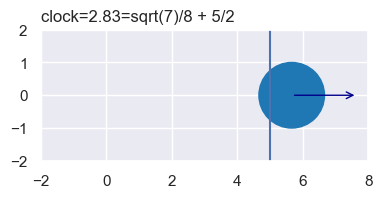

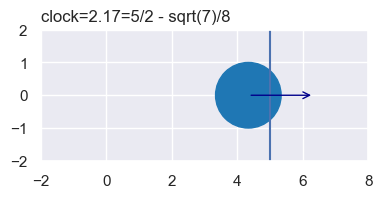

In [34]:
from sympy import Rational
from perfect_physics import load

times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("x_0", w.x0), ("y_0", w.y0), ("x_1", w.x1), ("y_1", w.y1),
                             ("p",Rational(1,8))])
         for time_solution in cw_time_solutions5]
print(times)
for time in times:
    plot([a.tick_clone(time)],[w], clock=time,
         colors=["tab:blue","tab:red"], xlim=(-2,8), ylim=(-2,2), figsize=(4,2), font_scale=1)
# pass

In [25]:
slope_0 = (y1-y0)/(x1-x0)
slope_1 = (aprime_y-y2)/(aprime_x-x2)
eq6 = Eq(slope_0, -1/slope_1)
eq6

Eq((-y_0 + y_1)/(-x_0 + x_1), -(a'_x - x_2)/(a'_y - y_2))

In [27]:
from sympy import nonlinsolve
from perfect_physics import save
cw_all_solutions = nonlinsolve([eq1, eq2, eq3, eq4, eq5, eq6], t, p, aprime_x, aprime_y, x2, y2)
cw_time_solutions = [t for t, p, aprime_x, aprime_y, x2, y2 in cw_all_solutions]
save(cw_time_solutions, "cw_time_solutions.sympy")
cw_time_solutions[0]

(a_r*sqrt(x_0**2 - 2*x_0*x_1 + x_1**2 + y_0**2 - 2*y_0*y_1 + y_1**2) - a_x*y_0 + a_x*y_1 + a_y*x_0 - a_y*x_1 - x_0*y_1 + x_1*y_0)/(a_vx*y_0 - a_vx*y_1 - a_vy*x_0 + a_vy*x_1)

In [30]:
len(cw_time_solutions)

2

[2, 3]


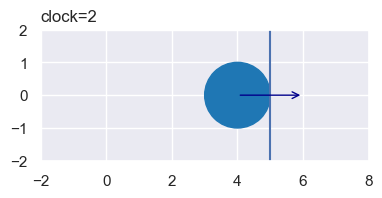

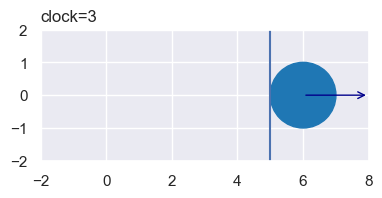

In [35]:
from sympy import Rational
from perfect_physics import load

cw_time_solutions = load("cw_time_solutions.sympy")
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("x_0", w.x0), ("y_0", w.y0), ("x_1", w.x1), ("y_1", w.y1),
                             ])
         for time_solution in cw_time_solutions]
print(times)
for time in times:
    plot([a.tick_clone(time)],[w], clock=time,
    colors=["tab:blue","tab:red"], xlim=(-2,8), ylim=(-2,2), figsize=(4,2), font_scale=1)

[nan, zoo]


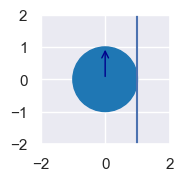

In [37]:
from sympy import Rational
from perfect_physics import load
from perfect_physics import Circle, Wall, plot

a = Circle(x=0,y=0,r=1,vx=0,vy=1)
w = Wall(x0=1,y0=-1,x1=1,y1=1)
plot(circle_list=[a], wall_list=[w],
     xlim=(-2,2), ylim=(-2,2), figsize=(2,2), font_scale=1)
cw_time_solutions = load("cw_time_solutions.sympy")
times = [time_solution.subs([("a_x", a.x), ("a_y", a.y), ("a_r", a.r), ("a_vx", a.vx), ("a_vy", a.vy),
                             ("x_0", w.x0), ("y_0", w.y0), ("x_1", w.x1), ("y_1", w.y1),
                             ])
         for time_solution in cw_time_solutions]
print(times)